In [1]:
%reload_ext autoreload
%autoreload 2

from fastai.tabular import *

In [2]:
path = Path('data/rossmann')

In [3]:
path.ls()

[PosixPath('data/rossmann/df'),
 PosixPath('data/rossmann/store.csv'),
 PosixPath('data/rossmann/state_names.csv'),
 PosixPath('data/rossmann/store_states.csv'),
 PosixPath('data/rossmann/train.csv'),
 PosixPath('data/rossmann/weather.csv'),
 PosixPath('data/rossmann/googletrend.csv'),
 PosixPath('data/rossmann/test.csv'),
 PosixPath('data/rossmann/sample_submission.csv'),
 PosixPath('data/rossmann/joined'),
 PosixPath('data/rossmann/joined_test'),
 PosixPath('data/rossmann/models'),
 PosixPath('data/rossmann/train_clean'),
 PosixPath('data/rossmann/test_clean')]

In [16]:
train_df = pd.read_pickle(path/'train_clean')

In [17]:
train_df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


In [18]:
train_df.shape

(844338, 93)

In [19]:
n = train_df.shape[0]

In [20]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()
small_train_df = train_df.iloc[idx[:1000]]
small_test_df = train_df.iloc[idx[1000:]]
small_cont_vars = ['CompetitionDistance', 'Mean_Humidity']
small_cat_vars = ['Store', 'DayOfWeek', 'PromoInterval']
small_train_df = small_train_df[small_cat_vars + small_cont_vars + ['Sales']]
small_test_df = small_test_df[small_cat_vars + small_cont_vars + ['Sales']]

In [21]:
small_train_df.dtypes

Store                    int64
DayOfWeek                int64
PromoInterval           object
CompetitionDistance    float64
Mean_Humidity            int64
Sales                    int64
dtype: object

In [22]:
hasattr(small_train_df.PromoInterval, 'cat')

False

In [23]:
small_train_df.isna().sum()

Store                    0
DayOfWeek                0
PromoInterval          527
CompetitionDistance      2
Mean_Humidity            0
Sales                    0
dtype: int64

In [24]:
categorify = Categorify(cat_names=small_cat_vars, cont_names=small_cont_vars)

In [25]:
categorify(small_train_df)

In [26]:
categorify(small_test_df, test=True)

In [27]:
small_train_df.dtypes

Store                  category
DayOfWeek              category
PromoInterval          category
CompetitionDistance     float64
Mean_Humidity             int64
Sales                     int64
dtype: object

In [28]:
hasattr(small_train_df.PromoInterval, 'cat')

True

In [29]:
small_train_df.isna().sum()

Store                    0
DayOfWeek                0
PromoInterval          527
CompetitionDistance      2
Mean_Humidity            0
Sales                    0
dtype: int64

In [30]:
fill_missing = FillMissing(cat_names=small_cat_vars, cont_names=small_cont_vars)

In [31]:
fill_missing(small_train_df)
fill_missing(small_test_df, test=True)

In [32]:
small_train_df.dtypes

Store                     category
DayOfWeek                 category
PromoInterval             category
CompetitionDistance        float64
Mean_Humidity                int64
Sales                        int64
CompetitionDistance_na        bool
dtype: object

In [33]:
small_train_df.isna().sum()

Store                       0
DayOfWeek                   0
PromoInterval             527
CompetitionDistance         0
Mean_Humidity               0
Sales                       0
CompetitionDistance_na      0
dtype: int64

In [34]:
small_train_df[small_train_df.CompetitionDistance_na==True]

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales,CompetitionDistance_na
55887,622,3,NaN,2640.0,58,5399,True
342785,879,6,"Feb,May,Aug,Nov",2640.0,62,3048,True


In [38]:
train_df = pd.read_pickle(path/'train_clean')
test_df = pd.read_pickle(path/'test_clean')

In [39]:
procs = [FillMissing, Categorify, Normalize]

In [40]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
            'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
            'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
            'SchoolHoliday_fw', 'SchoolHoliday_bw']
cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
             'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h',
             'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE', 
             'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [41]:
dep_var = 'Sales'

In [42]:
df = train_df[cat_vars + cont_vars + [dep_var, 'Date']].copy()

In [43]:
len(cat_vars), len(cont_vars)

(22, 16)

In [44]:
df.isna().sum()

Store                            0
DayOfWeek                        0
Year                             0
Month                            0
Day                              0
StateHoliday                     0
CompetitionMonthsOpen            0
Promo2Weeks                      0
StoreType                        0
Assortment                       0
PromoInterval               423292
CompetitionOpenSinceYear         0
Promo2SinceYear                  0
State                            0
Week                             0
Events                      203057
Promo_fw                         0
Promo_bw                         0
StateHoliday_fw                  0
StateHoliday_bw                  0
SchoolHoliday_fw                 0
SchoolHoliday_bw                 0
CompetitionDistance           2186
Max_TemperatureC                 0
Mean_TemperatureC                0
Min_TemperatureC                 0
Max_Humidity                     0
Mean_Humidity                    0
Min_Humidity        

In [45]:
test_df.Date.describe(), train_df.Date[len(test_df)]

(count                   41088
 unique                     48
 top       2015-09-15 00:00:00
 freq                      856
 first     2015-08-01 00:00:00
 last      2015-09-17 00:00:00
 Name: Date, dtype: object, Timestamp('2015-06-19 00:00:00'))

In [46]:
len(test_df), len(train_df.Date[train_df.Date == train_df.Date[len(test_df)]])

(41088, 1114)

In [47]:
cut = train_df.Date[train_df.Date == train_df.Date[len(test_df)]].index.max()

In [48]:
cut

41395

In [49]:
valid_idx = range(cut)

In [50]:
len(valid_idx)

41395

In [51]:
FloatList

fastai.data_block.FloatList

In [52]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
        .split_by_idx(valid_idx)
        .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
        .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
        .databunch())

> `TabularList.from_df()` **changes** the list `cat_vars`, when it creates additional boolean categorical variables for those continuous variables with missing values.  However, `df` itself is not changed, and `cont_vars` is not changed.  How to view the data as a dataframe after it has gone through the processes, `procs` via `TabularList.from_df()`?

In [53]:
len(cat_vars), len(cont_vars)

(24, 16)

In [54]:
cat_vars

['Store',
 'DayOfWeek',
 'Year',
 'Month',
 'Day',
 'StateHoliday',
 'CompetitionMonthsOpen',
 'Promo2Weeks',
 'StoreType',
 'Assortment',
 'PromoInterval',
 'CompetitionOpenSinceYear',
 'Promo2SinceYear',
 'State',
 'Week',
 'Events',
 'Promo_fw',
 'Promo_bw',
 'StateHoliday_fw',
 'StateHoliday_bw',
 'SchoolHoliday_fw',
 'SchoolHoliday_bw',
 'CompetitionDistance_na',
 'CloudCover_na']

In [55]:
max_log_y = np.log(1.2 * train_df.Sales.max())

In [56]:
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [57]:
learn = tabular_learner(data, layers=[1000, 500], ps=[.001, .01], emb_drop=.04, y_range=y_range, metrics=exp_rmspe)

In [58]:
len(data.train_ds.cat_names), len(data.train_ds.cont_names)

(24, 16)

In [59]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


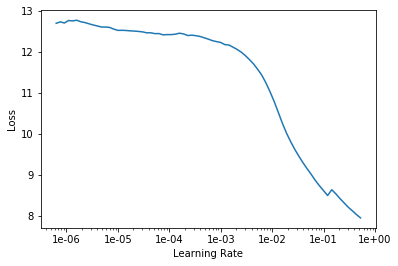

In [61]:
learn.recorder.plot(skip_end=15)

In [62]:
learn.fit_one_cycle(cyc_len=5, max_lr=1e-3, wd=.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.022228,0.022835,0.148430,01:50
1,0.019135,0.017711,0.137713,01:51
2,0.018380,0.023230,0.128646,01:49
3,0.012793,0.012088,0.104606,01:50
4,0.013797,0.013350,0.105668,01:50


In [63]:
learn.save('1')

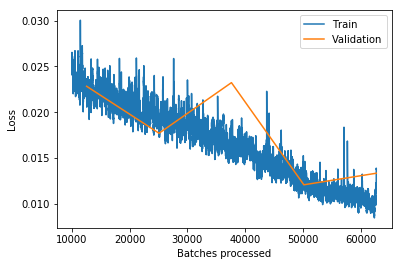

In [66]:
learn.recorder.plot_losses(skip_start=10000)

In [67]:
learn.load('1');

In [68]:
learn.fit_one_cycle(cyc_len=5, max_lr=3e-4)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.011107,0.014253,0.111313,01:53
1,0.012738,0.015863,0.117098,01:54
2,0.010739,0.015130,0.115798,01:54
3,0.009904,0.036400,0.118577,01:54
4,0.008721,0.021435,0.117396,01:56


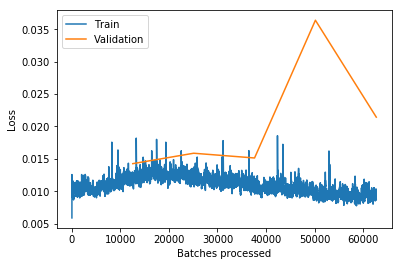

In [69]:
learn.recorder.plot_losses()

In [70]:
learn.fit_one_cycle(cyc_len=5, max_lr=3e-4)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.009482,0.016424,0.115022,01:55
1,0.012328,0.019975,0.121903,01:53
2,0.011305,0.017348,0.126969,01:54
3,0.009187,0.015216,0.124185,01:55
4,0.009388,0.022622,0.121484,01:55


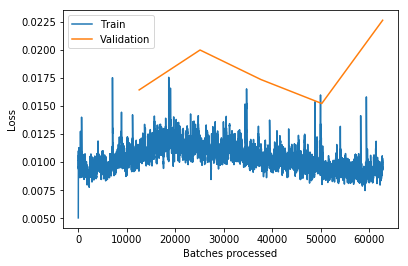

In [71]:
learn.recorder.plot_losses()

In [72]:
test_preds = learn.get_preds(DatasetType.Test)

In [90]:
test_df['Sales'] = np.exp(test_preds[0]).numpy().reshape(-1)

In [92]:
test_df[['Id', 'Sales']] = test_df[['Id', 'Sales']].astype('int')

In [95]:
test_df[['Id', 'Sales']].to_csv('rossman_submisssion.csv', index=False)

In [98]:
! head -n 10 rossman_submisssion.csv

Id,Sales
1,4385
2,6921
3,8927
4,7456
5,7286
6,5523
7,7240
8,7700
9,5164
